# Geração de Figuras para Análise de Carbono
Este notebook gera figuras relacionadas à análise de carbono e exibe prévias das imagens geradas.

In [1]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [2]:
# Configurar diretório para salvar figuras
base_path = 'results/figures/'
os.makedirs(base_path, exist_ok=True)

In [3]:
# Dados simulados para ilustração
np.random.seed(42)
y_true = np.random.uniform(7, 16, 50)
y_pred = y_true + np.random.normal(0, 1, 50)
X_sim = pd.DataFrame({
    'GEE_tCO2e': np.random.uniform(1e5, 5e5, 50),
    'area_desmatada_ha': np.random.uniform(100, 1000, 50),
    'pib': np.random.uniform(1e9, 5e9, 50),
})

## Figura 1: EQM dos Modelos

C:\Users\Windows\AppData\Local\Temp\ipykernel_4592\3086030426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=eqm, palette=colors)


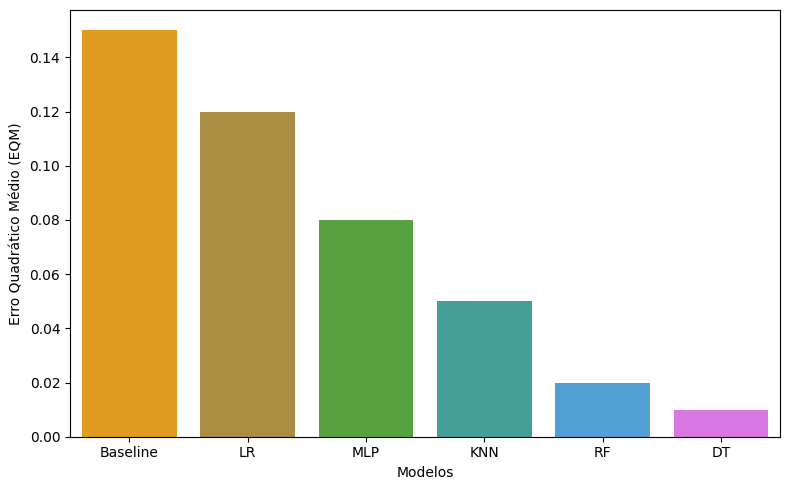

In [4]:
modelos = ['Baseline', 'LR', 'MLP', 'KNN', 'RF', 'DT']
eqm = [0.15, 0.12, 0.08, 0.05, 0.02, 0.01]
fig1_path = base_path + 'figura1_eqm_modelos.png'
plt.figure(figsize=(8, 5))
colors = sns.color_palette('husl', len(modelos))
colors[0] = 'orange'
sns.barplot(x=modelos, y=eqm, palette=colors)
plt.ylabel('Erro Quadrático Médio (EQM)')
plt.xlabel('Modelos')
plt.tight_layout()
plt.savefig(fig1_path)
plt.show()

## Figura 2: Correlação entre Atributos

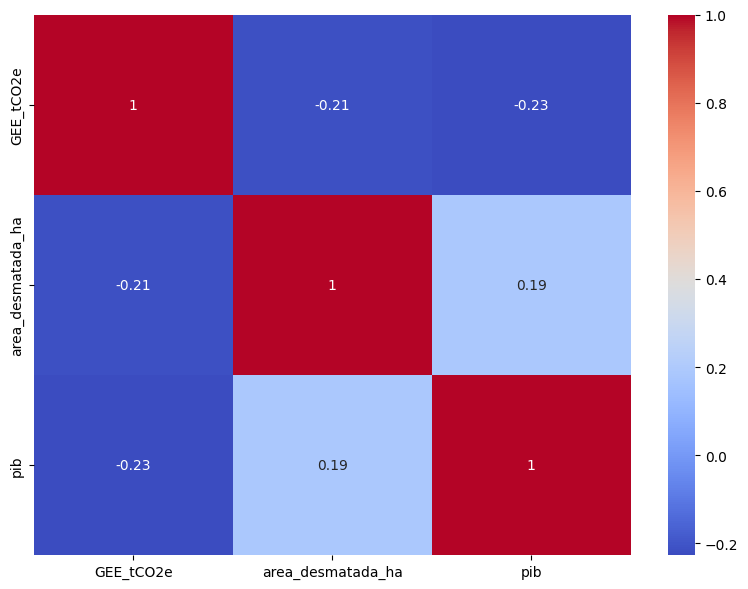

In [5]:
atributos = ['GEE_tCO2e', 'area_desmatada_ha', 'pib']
correlacoes = np.corrcoef(X_sim.T)
fig2_path = base_path + 'figura2_correlacoes.png'
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, xticklabels=atributos, yticklabels=atributos, cmap='coolwarm')
plt.tight_layout()
plt.savefig(fig2_path)
plt.show()

## Figura 3: Dispersão Real vs Predito

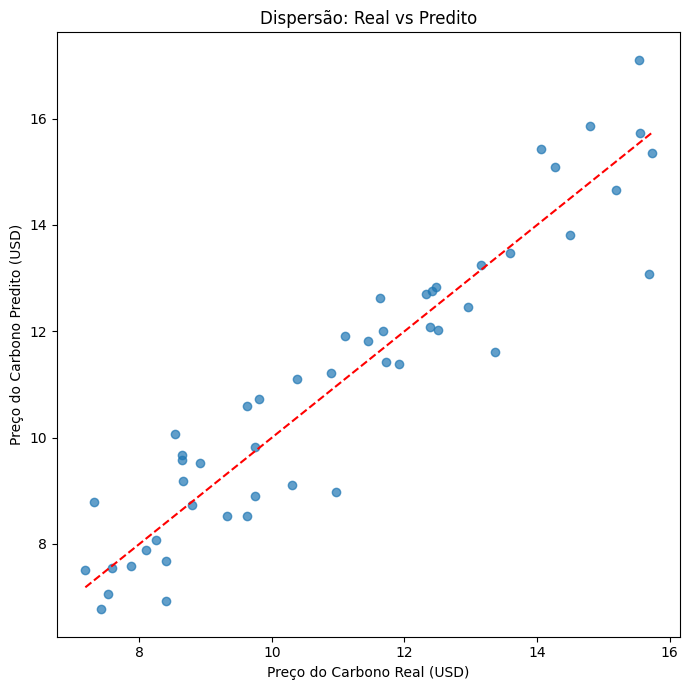

In [6]:
fig3_path = base_path + 'figura3_dispersion_real_predito.png'
plt.figure(figsize=(7, 7))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel('Preço do Carbono Real (USD)')
plt.ylabel('Preço do Carbono Predito (USD)')
plt.title('Dispersão: Real vs Predito')
plt.tight_layout()
plt.savefig(fig3_path)
plt.show()